# Perceptron

In [3]:
# This line is to ensure that the figure is generated inside the Jupyter Notebook Environment
%matplotlib inline

# Importing all the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt

Implement a linear classifier using the **Perceptron algorithm**. The perceptron algorithm computes a linear classifier using a stochastic error correcting learning algorithm. Two-class problem, distinct means, equal covariance matrices.

Text(0.5, 1.0, 'Data Plot')

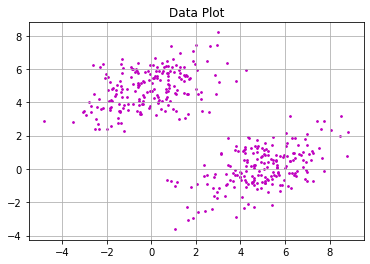

In [2]:
NumDataPerClass=200

# Two Class Problem, Distinct Means, Equal Covariances
m1=[[0,5]]
m2=[[5,0]]
C=[[2,1],[1,2]]

#Set Up the Data
A=np.linalg.cholesky(C)
X1=np.random.randn(NumDataPerClass,2)
Y1=X1@A+m1
X2=np.random.randn(NumDataPerClass,2)
Y2=X2@A+m2

# Plotting the Data Labels
plt.scatter(Y1[:,0], Y1[:, 1], s = 3, c = 'm')
#plt.scatter(X1[:, 0], X1[:, 1], s = 3, c = 'c')
plt.scatter(Y2[:,0], Y2[:, 1], s = 3, c = 'm')
#plt.scatter(X2[:, 0], X2[:, 1], s = 3, c = 'c')
plt.grid(True)
plt.title('Data Plot')

The distribution of your data should look like what is shown in Fig. 1. Note the data are linearly separable (i.e. a linear class boundary will classify the data correctly).
We will now train a perceptron algorithm to classify this data. A perceptron is a linear classifier whose training is done by error correction. If the weights of the perceptron are denoted a and the input features are in vector y, a perceptron decision function assigns the data to one class or the other depending on whether aT y<>0.


### 1: For simplicity, I have assumed the following (some of which you are free to change and study the effect):
 + There is an equal number of data NumDataPerClass in each class
 + We use an equal partition of the data into training and test sets, taken at random.


### 2: Concatenate data from two classes into one array

In [3]:
Y = np.concatenate((Y1, Y2))

### 3: Setting up targets (labels): we set +1 and —1 as labels to indicate the two classes.

In [4]:
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0*np.ones(NumDataPerClass) 
f = np.concatenate((labelPos, labelNeg))

### 4: Partitioning the data into training and test sets

In [17]:
# Generate random indices and order the data
rIndex = np.random.permutation(2*NumDataPerClass) 
Yr = Y[rIndex,]
fr = f[rIndex]

# Training and test sets (half half)
Y_train = Yr[0:NumDataPerClass]
f_train = fr[0:NumDataPerClass]
Y_test = Yr[NumDataPerClass:2*NumDataPerClass] 
f_test = fr[NumDataPerClass:2*NumDataPerClass] 
print(Y_train.shape, f_train.shape, Y_test.shape, f_test.shape)
Ntrain = NumDataPerClass; 
Ntest = NumDataPerClass;


(200, 2) (200,) (200, 2) (200,)


### 5: Calculating the percentage of correctly classified examples

In [12]:
def PercentCorrect(Inputs, targets, weights):
    N = len(targets)
    nCorrect = 0
    for n in range(N):
        Onelnput = Inputs[n,:]
        if (targets[n] * np.dot(Onelnput, weights) > 0):
            nCorrect +=1
    return 100*nCorrect/N

### 6: Iterative error correcting learning

In [21]:
# Random initialization of weights
a = np.random.randn(2) 
print(a)
# What is the performance with the initial random weights?
print('Initial Percentage Correct: ', PercentCorrect(Y_train, f_train, a))
# Number of iterations and Learning rate
MaxIter = 400 
alpha = 0.01
# Space for plots
P_train = np.zeros(MaxIter) 
P_test = np.zeros(MaxIter)
# Main Loop
for iter in range(MaxIter):
    # Select a data item at random
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    y = Y_train[r,:]
    # If it is misclassified, update weights
    if (f_train[r] * np.dot(y, a) < 0): 
        a += alpha * f_train[r] * y
    # Evaluate training and test performances for plotting
    P_train[iter] = PercentCorrect(Y_train, f_train, a); 
    P_test[iter] = PercentCorrect(Y_test, f_test, a);
print('Percentage Correct After Training: ', PercentCorrect(Y_train,f_train, a), PercentCorrect(Y_test,f_test, a))


[1.25769427 0.24424451]
Initial Percentage Correct:  32.0
Percentage Correct After Training:  99.5 98.5


### 7: Plot learning curves

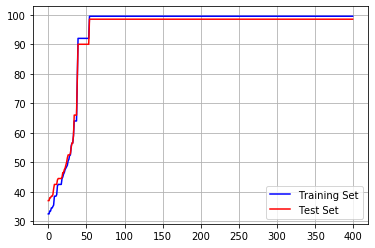

In [22]:
plt.plot(range(MaxIter), P_train, 'b', range(MaxIter), P_test, 'r') 
plt.grid(True)
plt.gca().legend(('Training Set','Test Set'))


### 8: The scikitlearn package is an excellent source of machine learning algorithms in Python. Compare the performance of your perceptron algorithm on the two-class Gaussian dataset with that of the perceptron tool in the scikitlearn package. Here is a snippet of code to help you get started:

In [25]:
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score 
model = Perceptron()
model.fit(Y_train, f_train)
fh_test = model.predict(Y_test)
print(accuracy_score(fh_test, f_test))


1.0


### 9: Consider the problem with means at m1 = [[2.5, 2.5]], m2 = [[10.0, 10.0]] with the covariance matrices equal and the same as before. Does the perceptron as implemented solve this problem? If not what modification is needed to help solve this problem? 


Text(0.5, 1.0, 'New Data Plot')

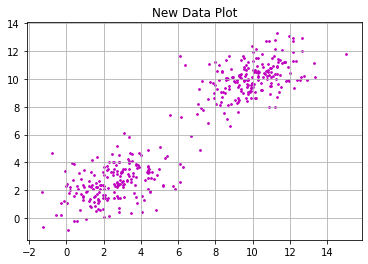

In [26]:
# New Distinct Means and Equal Covariance
m1=[[2.5,2.5]]
m2=[[10.0,10.0]]
C=[[2,1],[1,2]]

#Set Up the New Data
A2=np.linalg.cholesky(C)
X3=np.random.randn(NumDataPerClass,2)
Y3=X3@A2+m1
X4=np.random.randn(NumDataPerClass,2)
Y4=X4@A2+m2

# Plot the New Data
plt.scatter(Y3[:,0], Y3[:, 1], s = 3, c = 'm')
#plt.scatter(X1[:, 0], X1[:, 1], s = 3, c = 'c')
plt.scatter(Y4[:,0], Y4[:, 1], s = 3, c = 'm')
#plt.scatter(X2[:, 0], X2[:, 1], s = 3, c = 'c')
plt.grid(True)
plt.title('New Data Plot')


In [29]:
# Concatenate the Data Labels
YY = np.concatenate((Y3, Y4))

# Setting up Target Labels of +1 and -1
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0*np.ones(NumDataPerClass) 
f = np.concatenate((labelPos, labelNeg))

# Generate random indices and order the data
rIndex = np.random.permutation(2*NumDataPerClass) 
Yr = YY[rIndex,]
fr = f[rIndex]

# Training and test sets (half half)
Y_train = Yr[0:NumDataPerClass]
f_train = fr[0:NumDataPerClass]
Y_test = Yr[NumDataPerClass:2*NumDataPerClass] 
f_test = fr[NumDataPerClass:2*NumDataPerClass] 
print(Y_train.shape, f_train.shape, Y_test.shape, f_test.shape)
Ntrain = NumDataPerClass; 
Ntest = NumDataPerClass;


(200, 2) (200,) (200, 2) (200,)


[-0.29986199 -0.20061448]
Initial Percentage Correct:  49.0
Percentage Correct After Training:  45.5 40.5


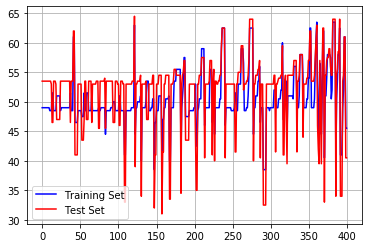

In [31]:
# Itertive Error Correcting Learning
# Random initialization of weights
a = np.random.randn(2) 
print(a)
# What is the performance with the initial random weights?
print('Initial Percentage Correct: ', PercentCorrect(Y_train, f_train, a))
# Number of iterations and Learning rate
MaxIter = 400 
alpha = 0.01
# Space for plots
P_train = np.zeros(MaxIter) 
P_test = np.zeros(MaxIter)
# Main Loop
for iter in range(MaxIter):
    # Select a data item at random
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    y = Y_train[r,:]
    # If it is misclassified, update weights
    if (f_train[r] * np.dot(y, a) < 0): 
        a += alpha * f_train[r] * y
    # Evaluate training and test performances for plotting
    P_train[iter] = PercentCorrect(Y_train, f_train, a); 
    P_test[iter] = PercentCorrect(Y_test, f_test, a);
print('Percentage Correct After Training: ', PercentCorrect(Y_train,f_train, a), PercentCorrect(Y_test,f_test, a))

# Plotting the New Learning Curves
plt.plot(range(MaxIter), P_train, 'b', range(MaxIter), P_test, 'r') 
plt.grid(True)
plt.gca().legend(('Training Set','Test Set'))

As, we can see above in the graph, that, the with the new means and equal covariances, our perceptron algorithm works poorly and it gives a very less accurate results for the classification of our data points. So, now we will be making some improvements to some of the parameters to make our classifier work properly on the new parameters we have. 

In [32]:
# New Modification
o = np.ones((2*NumDataPerClass, 1)) 
YN = np.append(YY, o, axis=1)

# Setting up Target Labels of +1 and -1
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0*np.ones(NumDataPerClass) 
f = np.concatenate((labelPos, labelNeg))

# Generate random indices and order the data
rIndex = np.random.permutation(2*NumDataPerClass) 
Yr = YN[rIndex,]
fr = f[rIndex]

# Training and test sets (half half)
Y_train = Yr[0:NumDataPerClass]
f_train = fr[0:NumDataPerClass]
Y_test = Yr[NumDataPerClass:2*NumDataPerClass] 
f_test = fr[NumDataPerClass:2*NumDataPerClass] 
print(Y_train.shape, f_train.shape, Y_test.shape, f_test.shape)
Ntrain = NumDataPerClass; 
Ntest = NumDataPerClass;



(200, 3) (200,) (200, 3) (200,)


[ 0.02225124 -0.73458871 -0.57577355]
Initial Percentage Correct:  48.0
Percentage Correct After Training:  99.5 98.5


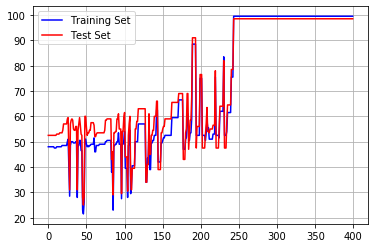

In [37]:
# Itertive Error Correcting Learning
# Random initialization of weights
a = np.random.randn(3) # New Modification
print(a)
# What is the performance with the initial random weights?
print('Initial Percentage Correct: ', PercentCorrect(Y_train, f_train, a))
# Number of iterations and Learning rate
MaxIter = 400 
alpha = 0.01
# Space for plots
P_train = np.zeros(MaxIter) 
P_test = np.zeros(MaxIter)
# Main Loop
for iter in range(MaxIter):
    # Select a data item at random
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    y = Y_train[r,:] #random row from y_train
    # If it is misclassified, update weights
    if (f_train[r] * np.dot(y, a) < 0): 
        a += alpha * f_train[r] * y
    # Evaluate training and test performances for plotting
    P_train[iter] = PercentCorrect(Y_train, f_train, a); 
    P_test[iter] = PercentCorrect(Y_test, f_test, a);
print('Percentage Correct After Training: ', PercentCorrect(Y_train,f_train, a), PercentCorrect(Y_test,f_test, a))

# Plotting the New Learning Curves
plt.plot(range(MaxIter), P_train, 'b', range(MaxIter), P_test, 'r') 
plt.grid(True)
plt.gca().legend(('Training Set','Test Set'))

After applying the new modifications to some of the parameters, we can now clearly observe that our perceptron performace has improved drastically. Earlier, in the test set, the accuracy was 48%, and after the required modification, we can see that the test set accuracy is 90%. 

### 10: Download a two class classification problem from the UCI machine Learning Repository of benchmark datasets https://archive.ics.uci.edu/ml/index.php and classify using your own perceptron algorithm. How does the performance compare to any quoted results on this dataset by other researchers? You may need more python tools to read and manipulate downloaded data (e.g. Pandas).

In [1]:
from numpy import genfromtxt
my_data = genfromtxt('C:\\Users\\aryam\\Desktop\\soton\\ml\\lab\\LAB2\\ds3\\iris.data', delimiter=',')

Text(0.5, 1.0, 'Iris Data')

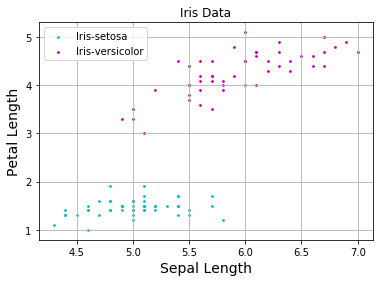

In [9]:
Y3=my_data[0:50,0:4]
Y4=my_data[50:100,0:4]

# Plot the New Data
plt.scatter(Y3[:,0], Y3[:, 2], s = 3, c = 'c')
#plt.scatter(X1[:, 0], X1[:, 1], s = 3, c = 'c')
plt.scatter(Y4[:,0], Y4[:, 2], s = 3, c = 'm')
#plt.scatter(X2[:, 0], X2[:, 1], s = 3, c = 'c')
plt.grid(True)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Petal Length', fontsize=14)
plt.gca().legend(('Iris-setosa','Iris-versicolor'))
plt.title('Iris Data')


In [10]:
YY = np.concatenate((Y3, Y4))
NumDataPerClass = 50
# Setting up Target Labels of +1 and -1
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0*np.ones(NumDataPerClass) 
f = np.concatenate((labelPos, labelNeg))

# Generate random indices and order the data
rIndex = np.random.permutation(2*NumDataPerClass) 
Yr = YY[rIndex,]
fr = f[rIndex]

# Training and test sets (half half)
Y_train = Yr[0:NumDataPerClass]
f_train = fr[0:NumDataPerClass]
Y_test = Yr[NumDataPerClass:2*NumDataPerClass] 
f_test = fr[NumDataPerClass:2*NumDataPerClass] 
print(Y_train.shape, f_train.shape, Y_test.shape, f_test.shape)
Ntrain = NumDataPerClass; 
Ntest = NumDataPerClass;


(50, 4) (50,) (50, 4) (50,)


In [14]:
# New Modification
o = np.ones((2*NumDataPerClass, 1)) 
YN = np.append(YY, o, axis=1)

# Setting up Target Labels of +1 and -1
labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0*np.ones(NumDataPerClass) 
f = np.concatenate((labelPos, labelNeg))

# Generate random indices and order the data
rIndex = np.random.permutation(2*NumDataPerClass) 
Yr = YN[rIndex,]
fr = f[rIndex]

# Training and test sets (half half)
Y_train = Yr[0:NumDataPerClass]
f_train = fr[0:NumDataPerClass]
Y_test = Yr[NumDataPerClass:2*NumDataPerClass] 
f_test = fr[NumDataPerClass:2*NumDataPerClass] 
print(Y_train.shape, f_train.shape, Y_test.shape, f_test.shape)
Ntrain = NumDataPerClass; 
Ntest = NumDataPerClass;

(50, 5) (50,) (50, 5) (50,)


[ 0.07168898  0.88441038  0.14497629 -0.43956     0.32508783]
Initial Percentage Correct:  44.0
Percentage Correct After Training:  100.0 100.0


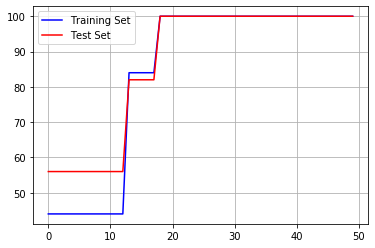

In [18]:
# Itertive Error Correcting Learning
# Random initialization of weights
a = np.random.randn(5) # New Modification
print(a)
# What is the performance with the initial random weights?
print('Initial Percentage Correct: ', PercentCorrect(Y_train, f_train, a))
# Number of iterations and Learning rate
MaxIter = 50
alpha = 0.01
# Space for plots
P_train = np.zeros(MaxIter) 
P_test = np.zeros(MaxIter)
# Main Loop
for iter in range(MaxIter):
    # Select a data item at random
    r = np.floor(np.random.rand()*Ntrain).astype(int)
    y = Y_train[r,:] #random row from y_train
    # If it is misclassified, update weights
    if (f_train[r] * np.dot(y, a) < 0): 
        a += alpha * f_train[r] * y
    # Evaluate training and test performances for plotting
    P_train[iter] = PercentCorrect(Y_train, f_train, a); 
    P_test[iter] = PercentCorrect(Y_test, f_test, a);
print('Percentage Correct After Training: ', PercentCorrect(Y_train,f_train, a), PercentCorrect(Y_test,f_test, a))

# Plotting the New Learning Curves
plt.plot(range(MaxIter), P_train, 'b', range(MaxIter), P_test, 'r') 
plt.grid(True)
plt.gca().legend(('Training Set','Test Set'))